In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA

In [130]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [131]:
creditcard_df.shape

(8950, 18)

In [132]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [133]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [134]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [135]:
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [136]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [137]:
creditcard_df[creditcard_df["CASH_ADVANCE"] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


VISUALIZAÇÃO E EXPLORAÇÃO DE DADOS

<Axes: >

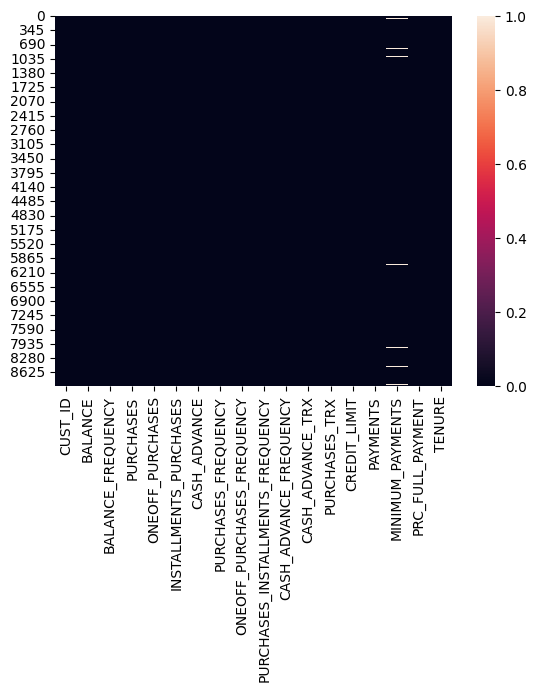

In [138]:
sns.heatmap(creditcard_df.isnull())

In [139]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [140]:
creditcard_df["MINIMUM_PAYMENTS"].mean()

864.2065423050828

In [141]:
creditcard_df.loc[(creditcard_df["MINIMUM_PAYMENTS"].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [142]:
creditcard_df.loc[(creditcard_df["CREDIT_LIMIT"].isnull() == True), "CREDIT_LIMIT"] = creditcard_df["CREDIT_LIMIT"].mean()

In [143]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [144]:
creditcard_df.duplicated().sum()

0

In [145]:
creditcard_df.drop('CUST_ID', axis= 1, inplace= True)

In [146]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [147]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [148]:
len(creditcard_df.columns)

17

C:\Users\User\AppData\Local\Temp\ipykernel_10072\3788093979.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde=True)
C:\Users\User\AppData\Local\Temp\ipykernel_10072\3788093979.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditc

C:\Users\User\AppData\Local\Temp\ipykernel_10072\3788093979.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde=True)
C:\Users\User\AppData\Local\Temp\ipykernel_10072\3788093979.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditc

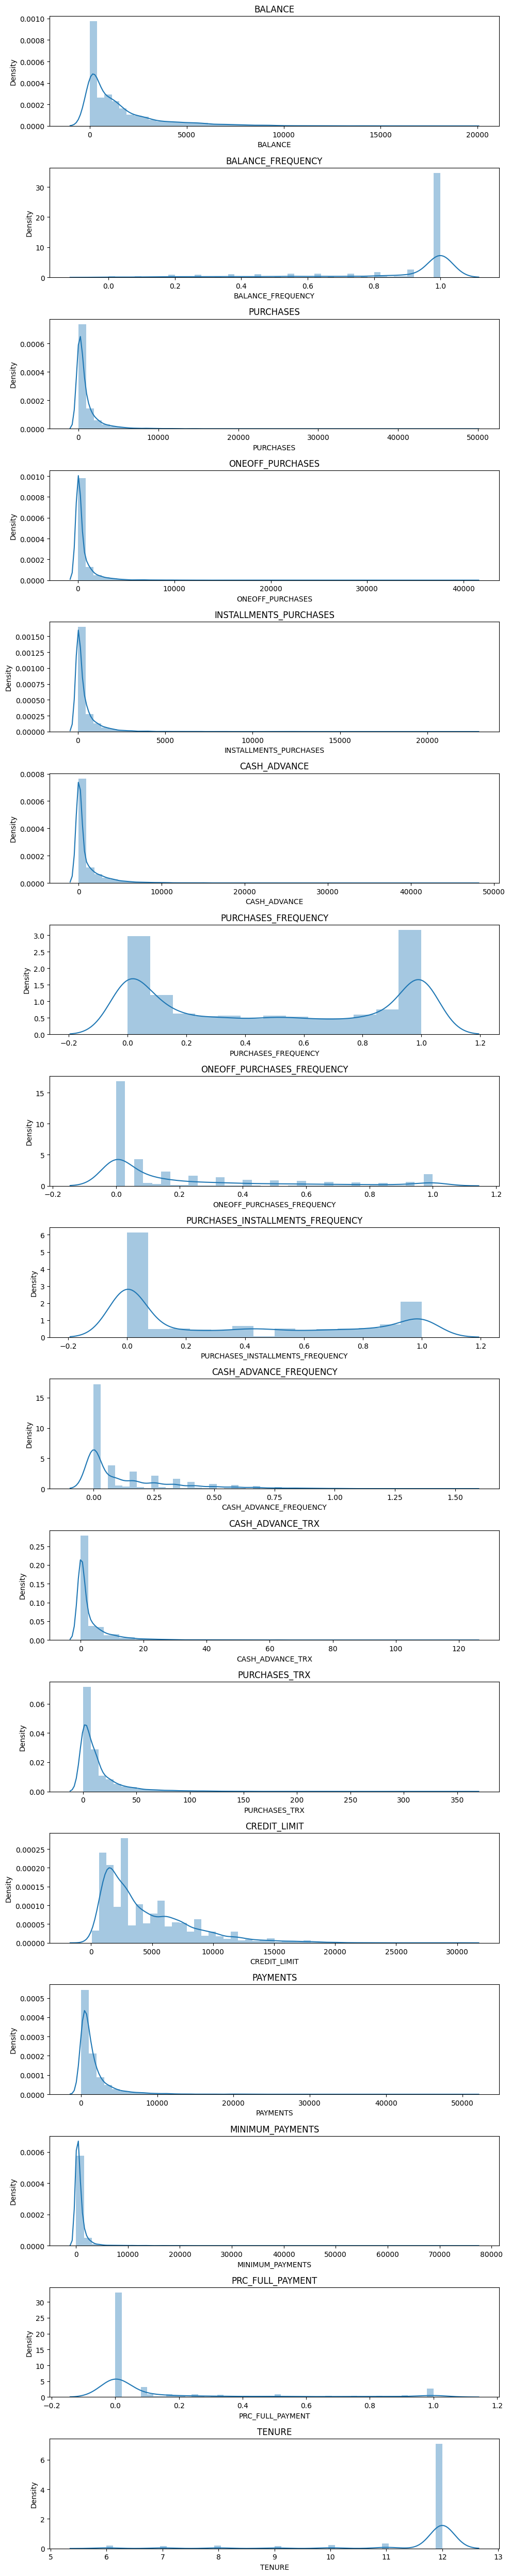

In [149]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17,1, i + 1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde=True)
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

In [150]:
correlations = creditcard_df.corr()

<Axes: >

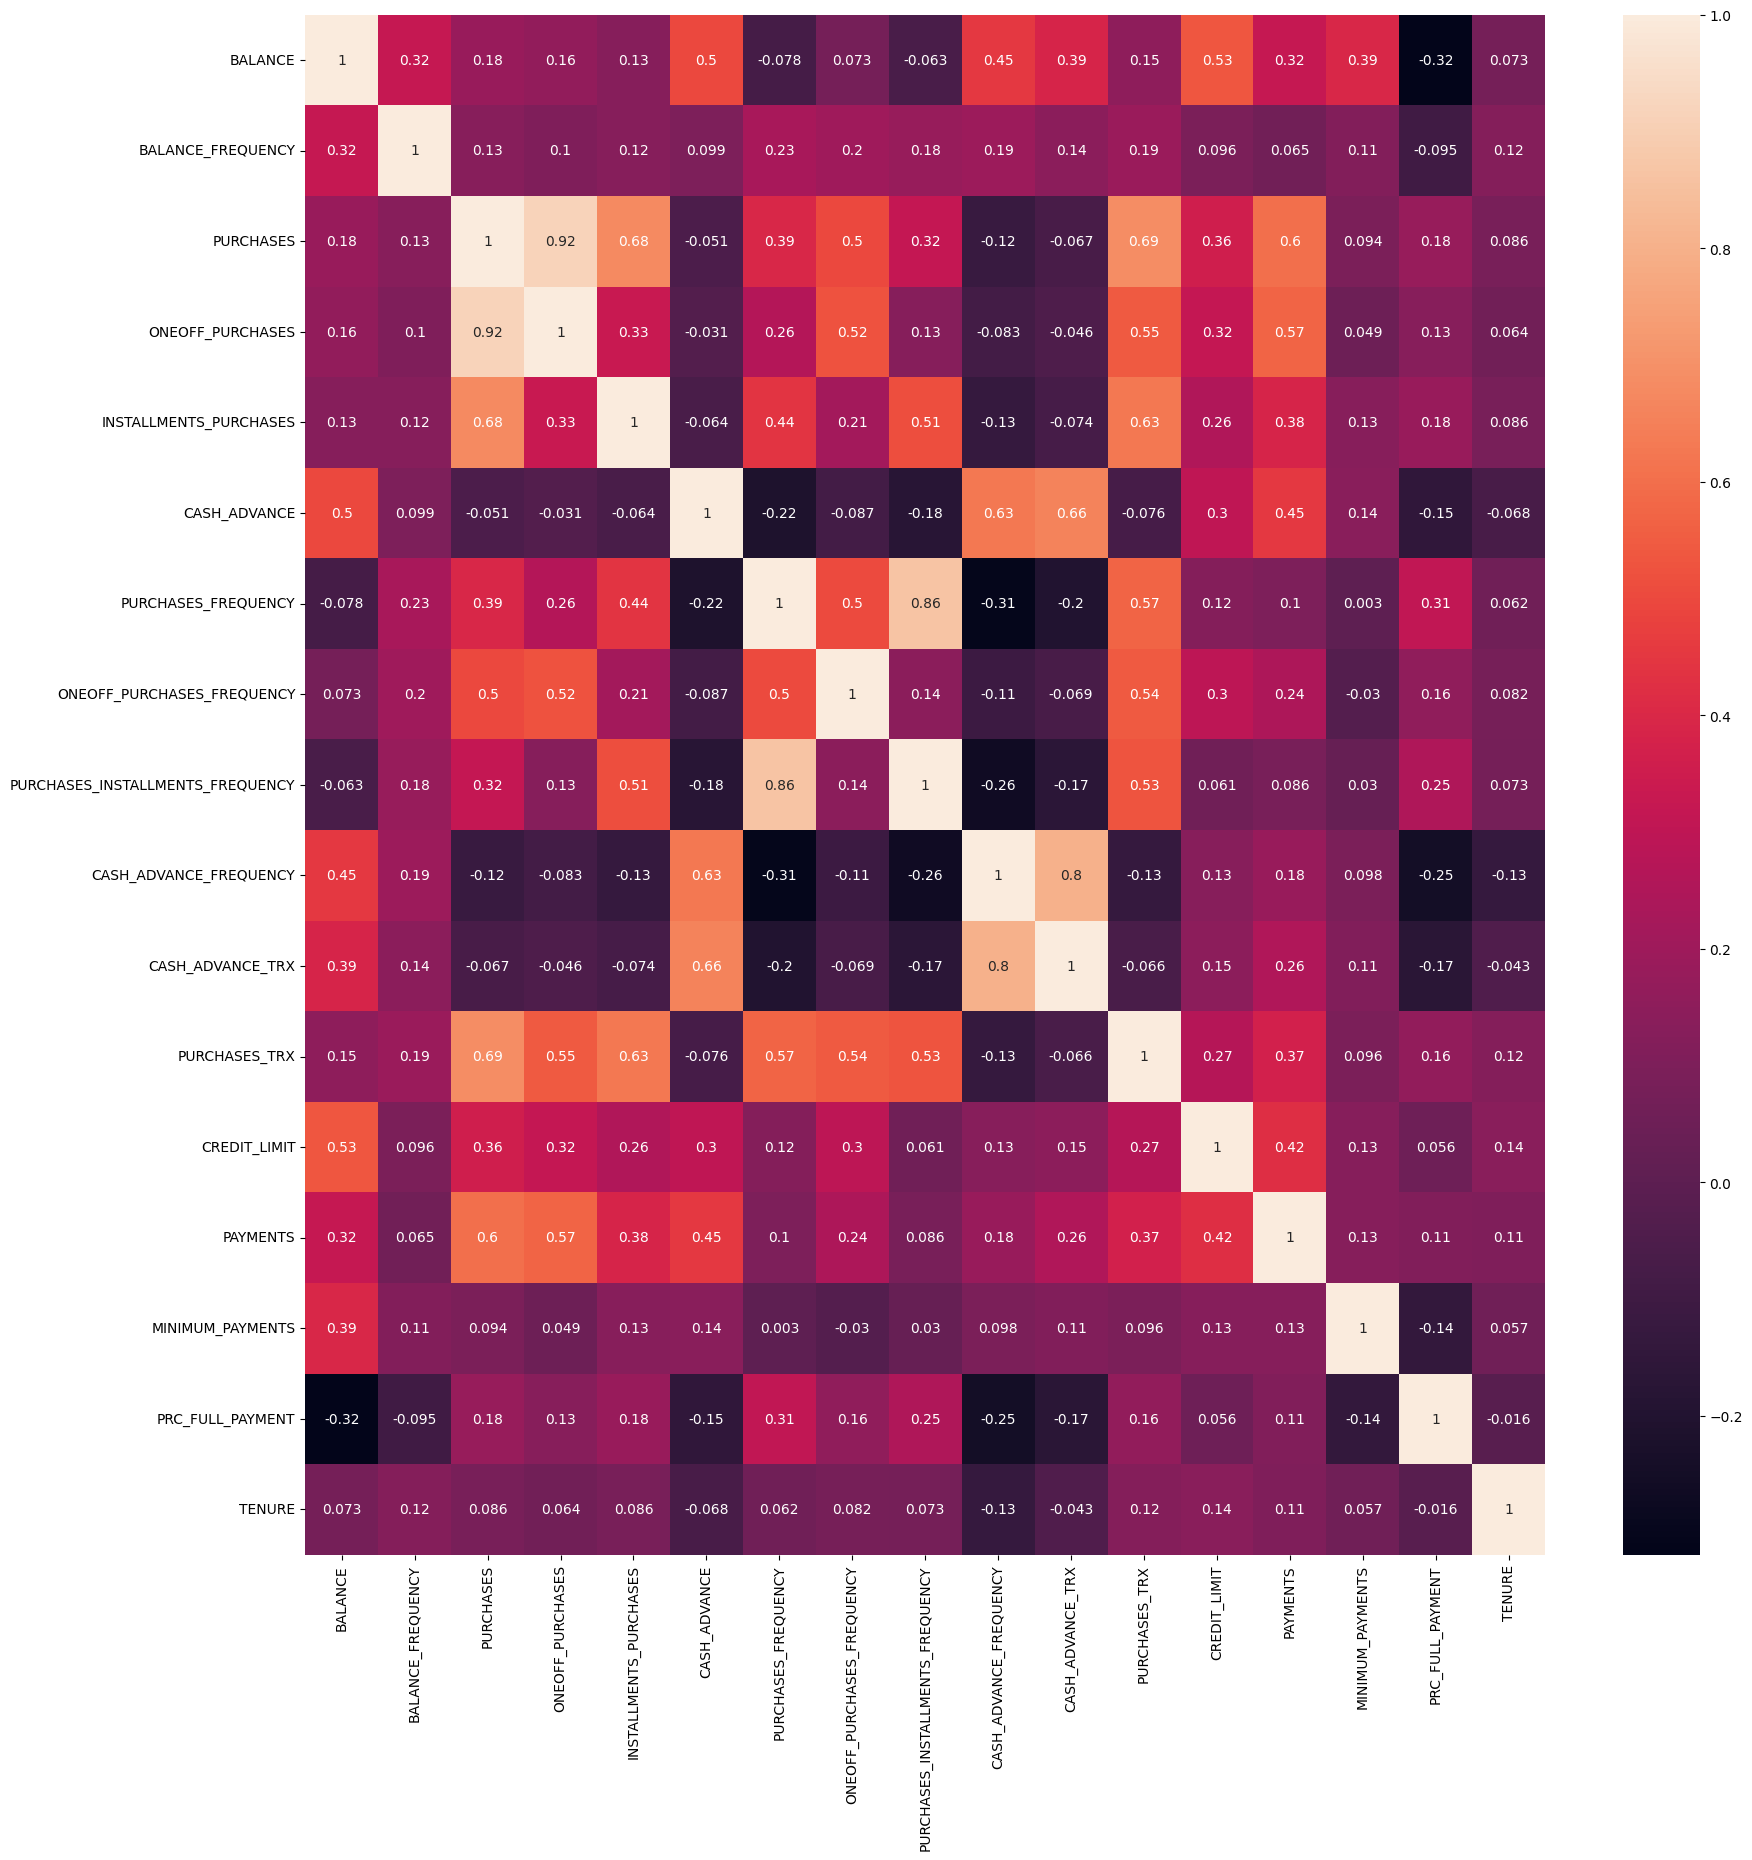

In [151]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)

DEFINIÇÃO DE NÚMERO DE CLUSTERS USANDO O ELBOW METHOD

In [152]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [153]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [154]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [155]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [156]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

In [157]:
print(wcss_1)

[152149.99999999983, 127784.8744914511, 111986.64440741186, 99073.93826774803, 91502.92043249564, 84852.48921956698, 79882.15918175734, 74509.47235438717, 69979.73313670921, 66502.5505603276, 63645.153610237874, 61361.91577233962, 59165.2289821264, 57498.8604921948, 55886.36950801748, 54672.66731161579, 52895.05087742522, 52165.50235060357, 50671.31062973601]


Text(0, 0.5, 'WCSS')

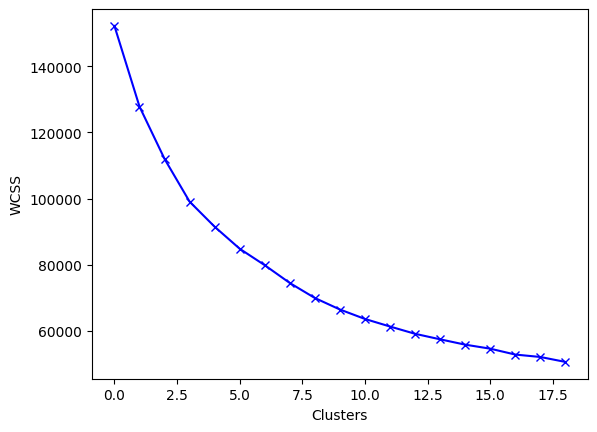

In [158]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

AGRUPAMENTO COM K-MEANS

In [159]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [160]:
labels, len(labels)

(array([0, 3, 2, ..., 5, 5, 5]), 8950)

In [161]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2719, 2023, 1089,  869,   30,  622, 1180,  418], dtype=int64))

In [162]:
kmeans.cluster_centers_

array([[ 1.71980452e-02,  4.03520834e-01, -3.61166683e-01,
        -2.46494228e-01, -4.01007781e-01, -9.07976370e-02,
        -8.65228364e-01, -4.09369689e-01, -7.56913008e-01,
         1.08920105e-01, -2.55176980e-02, -4.85888943e-01,
        -3.05343016e-01, -2.49511086e-01, -9.78735506e-03,
        -4.56880411e-01,  2.72429206e-01],
       [-3.62560930e-01,  3.34251605e-01, -3.59158024e-02,
        -2.41498301e-01,  3.58563398e-01, -3.62472589e-01,
         9.91205977e-01, -3.79940525e-01,  1.20560426e+00,
        -4.71495018e-01, -3.57855968e-01,  1.89721747e-01,
        -2.57136146e-01, -2.15200022e-01, -4.53702189e-02,
         3.11226282e-01,  2.57255159e-01],
       [-1.74004256e-01,  3.90092622e-01,  4.73079855e-01,
         6.21599200e-01, -2.35380182e-02, -3.40134574e-01,
         9.43912440e-01,  1.89396142e+00,  7.51269908e-02,
        -4.21138800e-01, -3.34512623e-01,  5.28991621e-01,
         3.77570900e-01,  9.83334118e-02, -1.65685002e-01,
         4.29219620e-01,  2.6

In [163]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.017198,0.403521,-0.361167,-0.246494,-0.401008,-0.090798,-0.865228,-0.409370,-0.756913,0.108920,-0.025518,-0.485889,-0.305343,-0.249511,-0.009787,-0.456880,0.272429
1,-0.362561,0.334252,-0.035916,-0.241498,0.358563,-0.362473,0.991206,-0.379941,1.205604,-0.471495,-0.357856,0.189722,-0.257136,-0.215200,-0.045370,0.311226,0.257255
2,-0.174004,0.390093,0.473080,0.621599,-0.023538,-0.340135,0.943912,1.893961,0.075127,-0.421139,-0.334513,0.528992,0.377571,0.098333,-0.165685,0.429220,0.263243
3,1.685439,0.396123,-0.217343,-0.155445,-0.228395,2.014458,-0.475781,-0.207621,-0.413706,1.924859,1.937562,-0.264627,1.026511,0.805431,0.527255,-0.395608,0.070372
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
6,-0.701301,-2.145742,-0.312580,-0.237627,-0.302414,-0.319631,-0.557290,-0.445936,-0.439730,-0.520491,-0.375978,-0.420029,-0.175997,-0.193764,-0.256447,0.282999,0.199199
7,0.930005,0.467293,2.250289,1.707075,2.184612,-0.191383,1.160280,1.549471,1.257353,-0.306841,-0.207888,2.792254,1.232050,1.281411,0.572226,0.270314,0.333865


In [164]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1600.271107,0.972861,231.566648,183.307439,48.441284,788.464226,0.143093,0.080335,0.063621,0.156940,3.074687,2.632450,3383.486632,1010.833706,841.397524,0.020085,11.881898
1,809.834856,0.956452,926.470168,191.599654,735.312076,218.749161,0.888169,0.089114,0.843575,0.040793,0.806723,19.425606,3558.882947,1110.160873,758.473161,0.244743,11.861592
2,1202.299656,0.969680,2013.947236,1624.164729,389.782507,265.593021,0.869188,0.767463,0.394295,0.050870,0.966024,27.858586,5868.206862,2017.809444,478.084634,0.279254,11.869605
3,5072.573064,0.971109,538.847483,334.431287,204.533057,5203.283997,0.299397,0.140520,0.200020,0.520328,16.471264,8.132184,8229.315569,4064.788976,2092.952849,0.038006,11.611494
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
6,104.775959,0.368964,335.372483,198.025254,137.598754,308.589438,0.266683,0.069426,0.189677,0.030989,0.683051,4.269492,3854.101224,1172.215717,266.568261,0.236487,11.783898
7,3500.201434,0.987968,5810.981818,3425.831986,2386.585239,577.531077,0.956027,0.664695,0.864141,0.073742,1.830144,84.114833,8977.153110,5442.702336,2197.755933,0.232777,11.964115


In [165]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


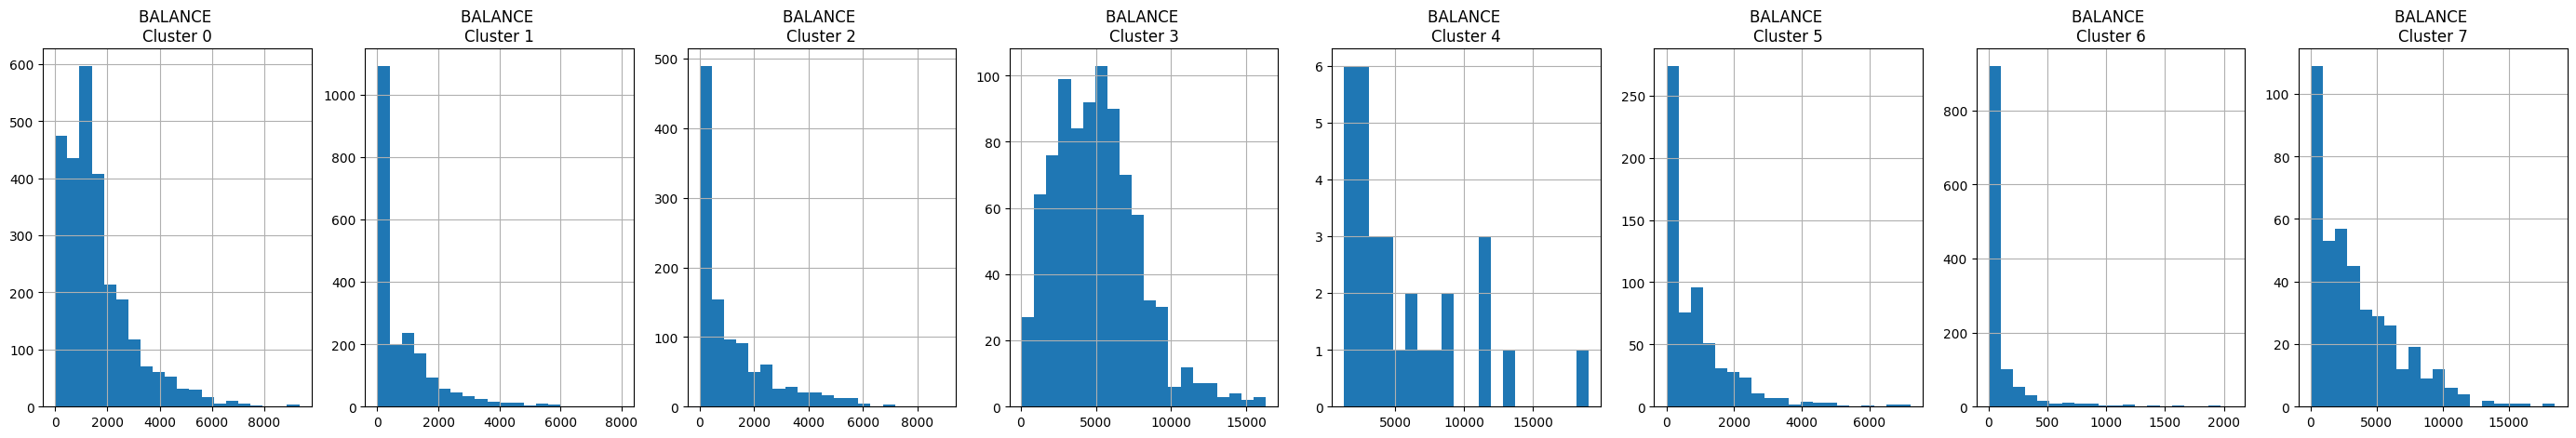

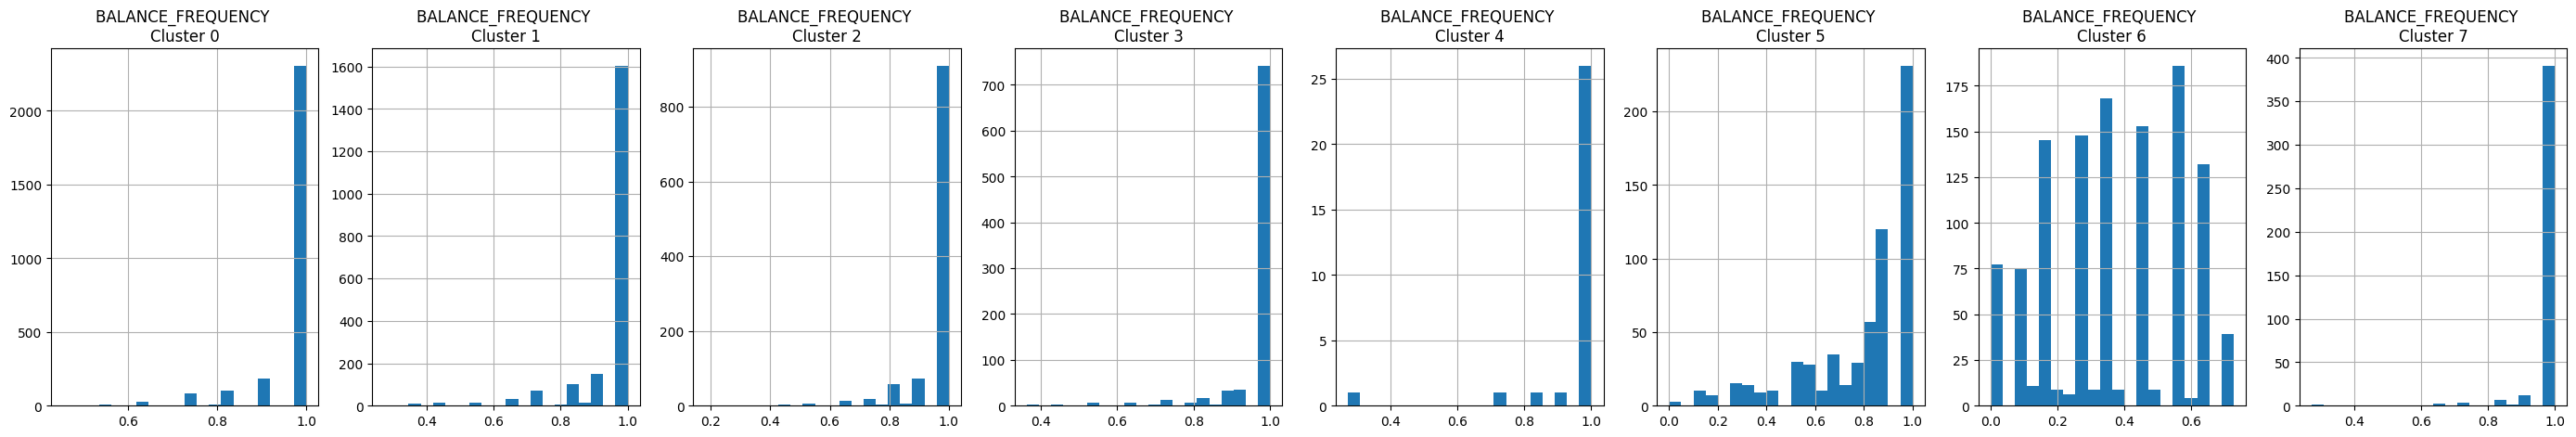

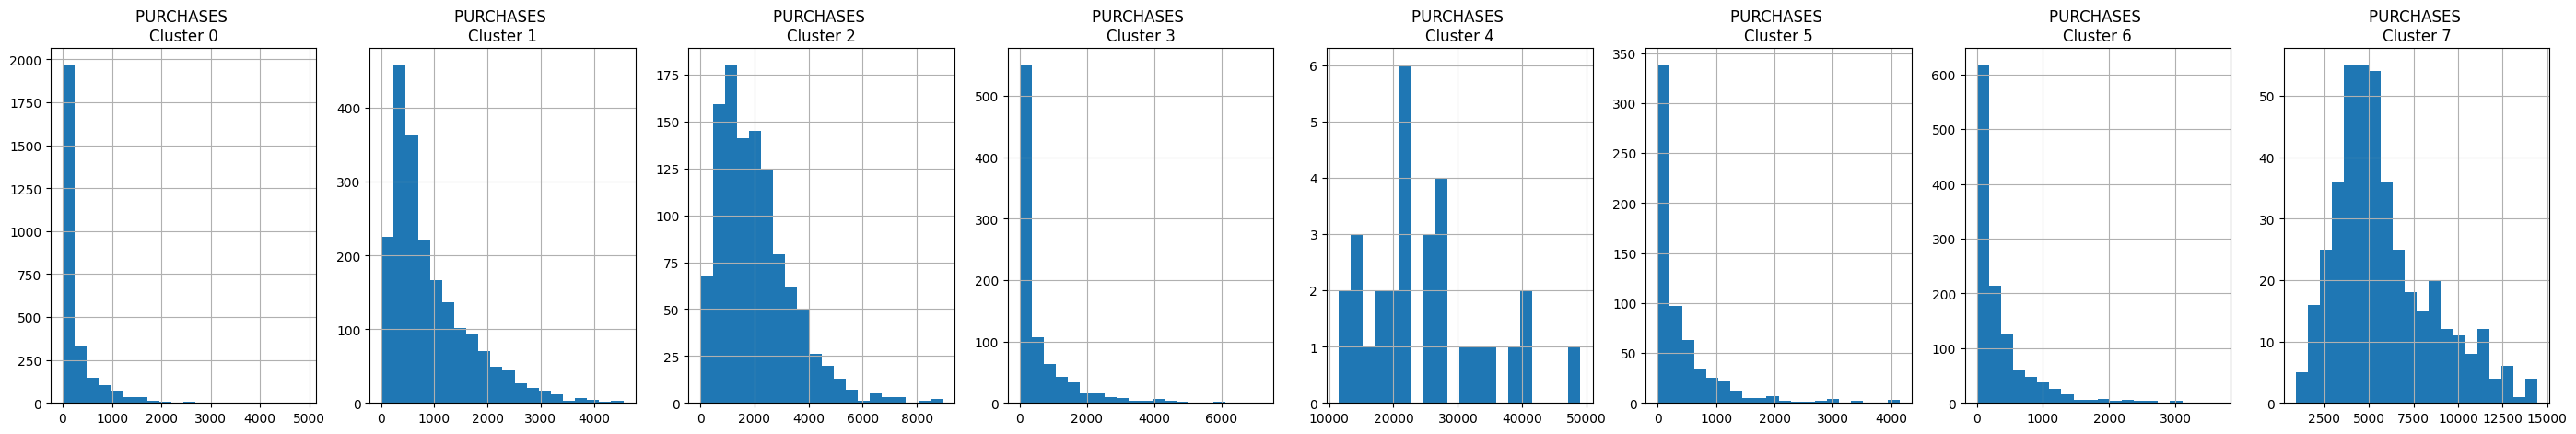

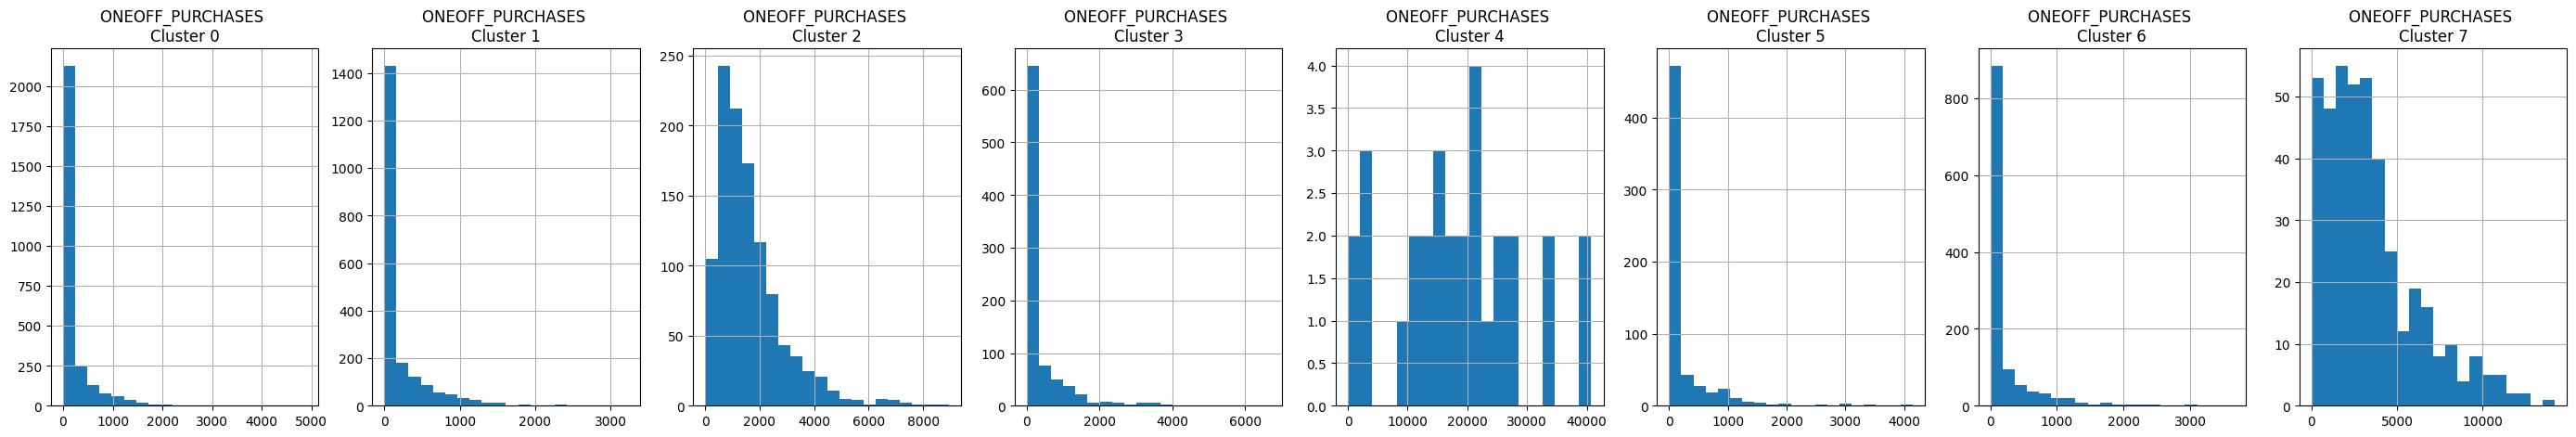

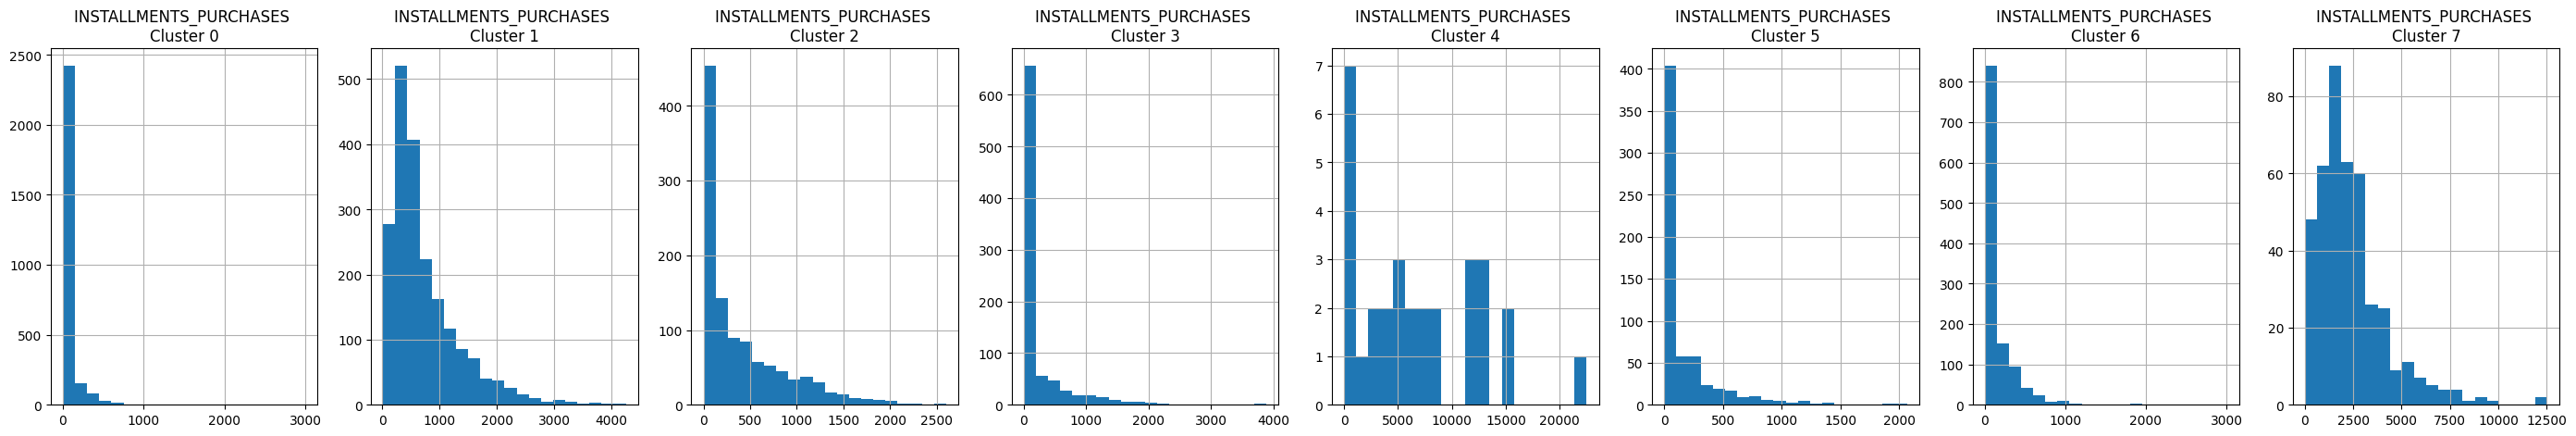

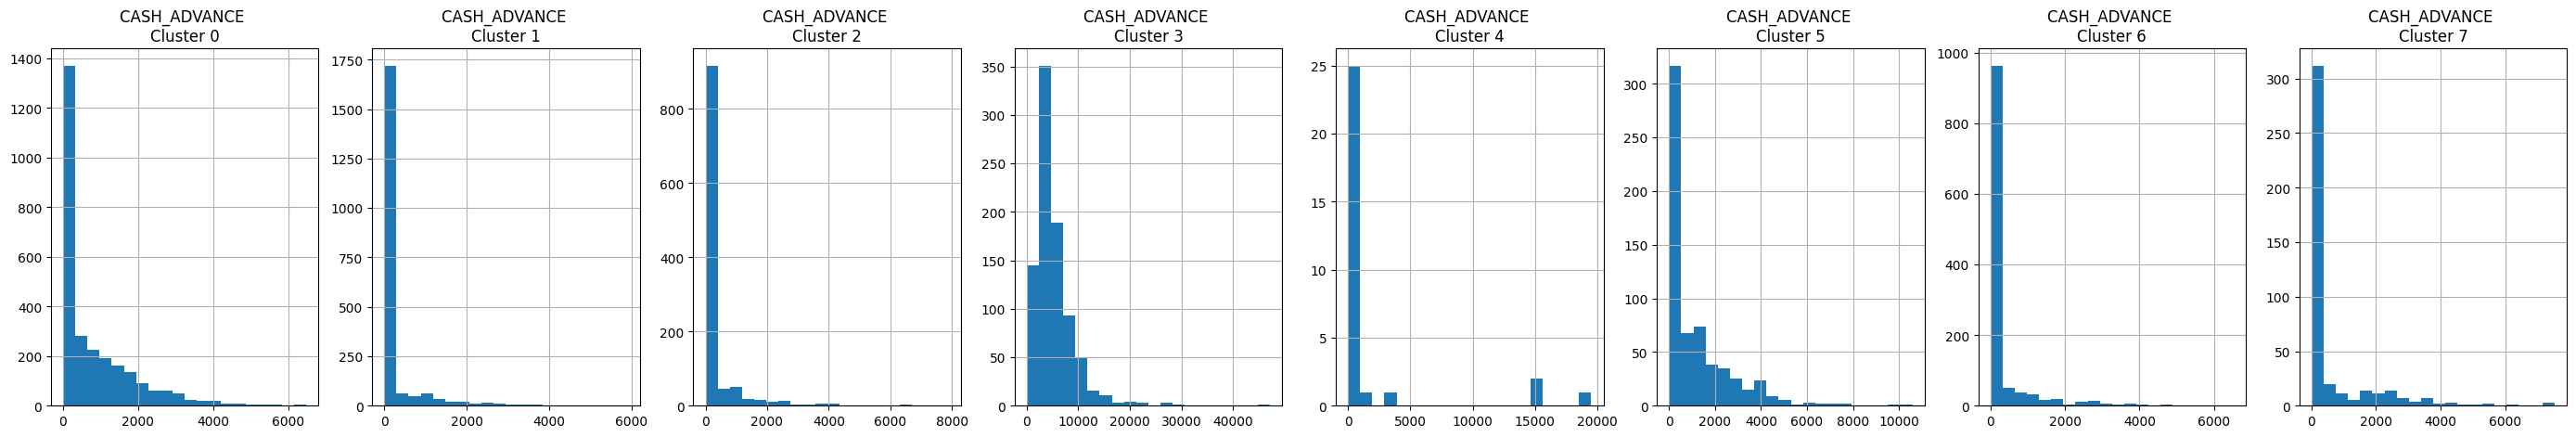

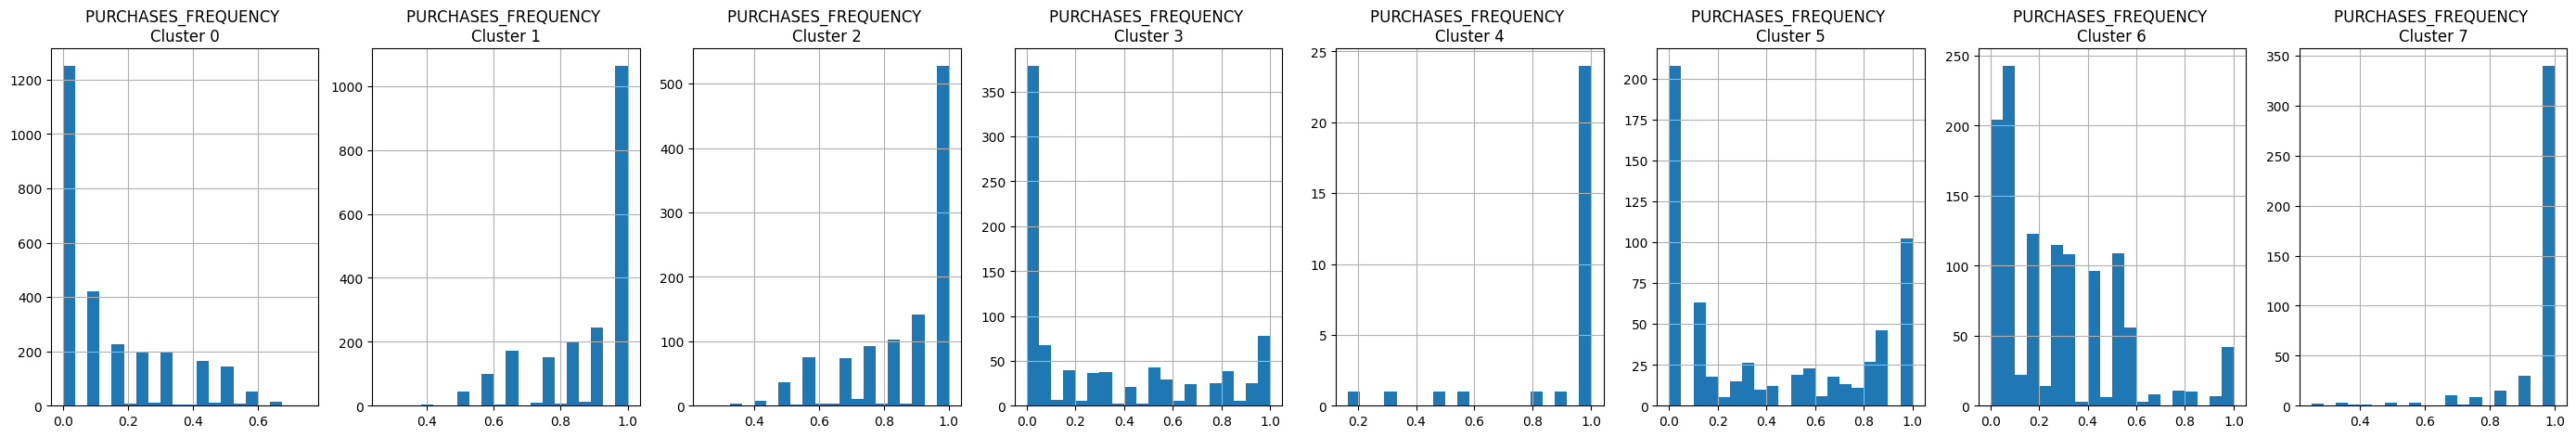

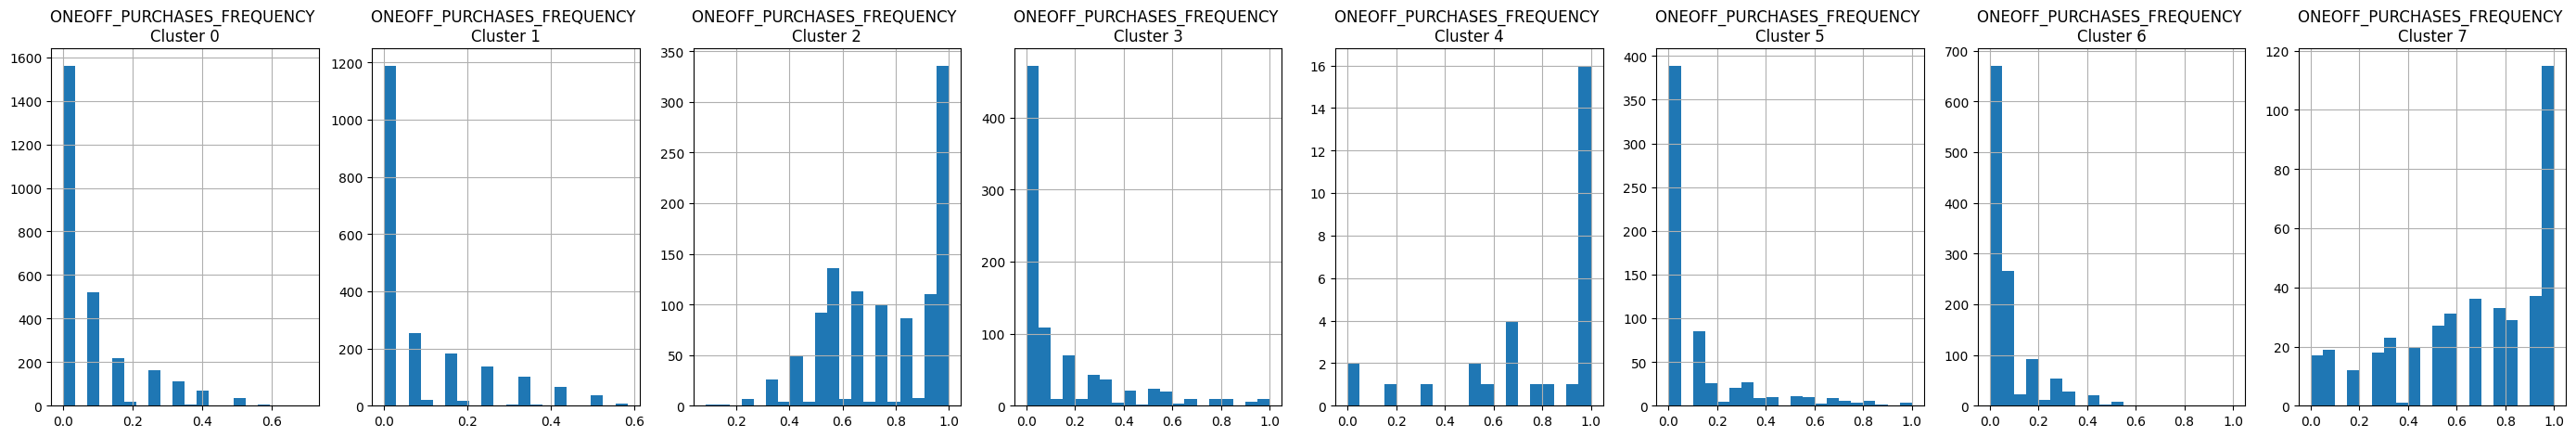

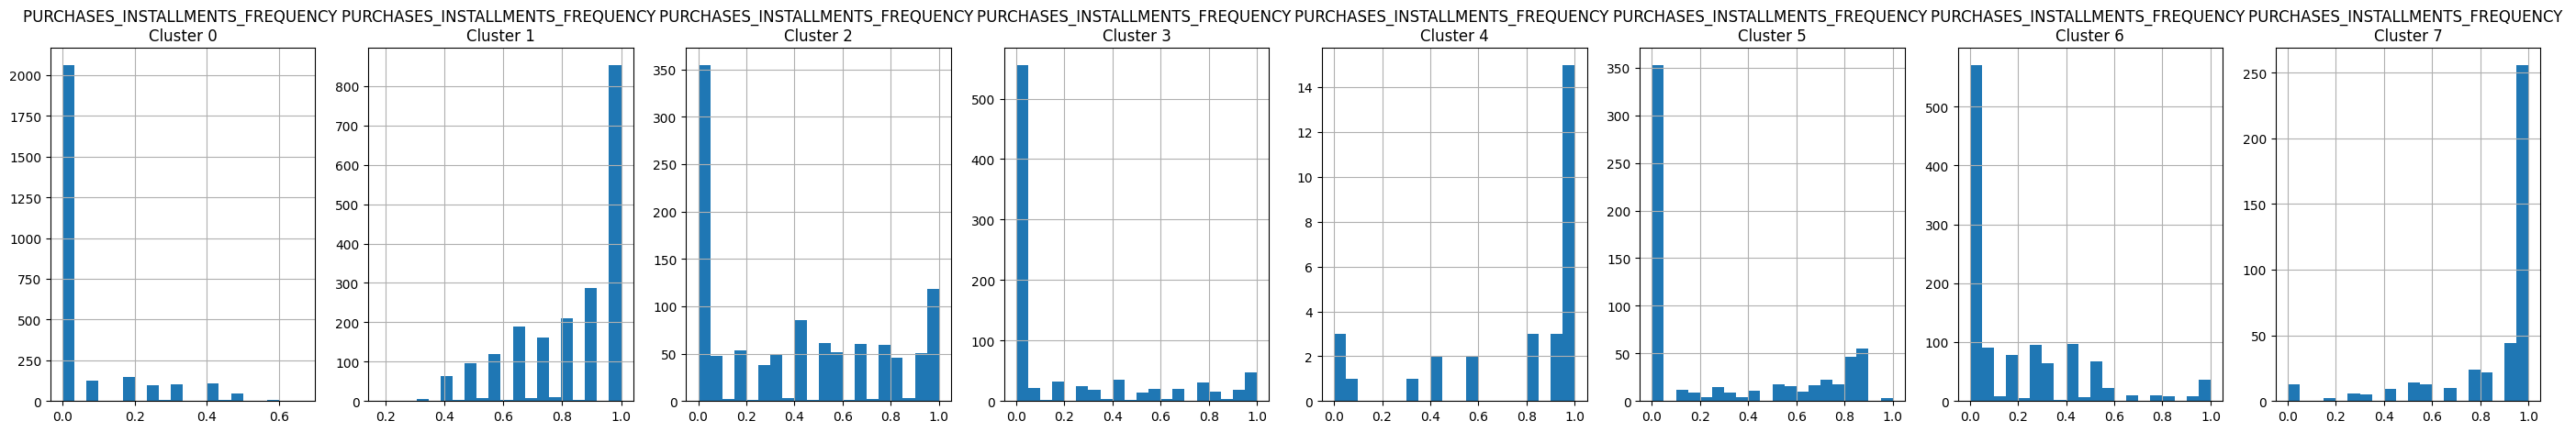

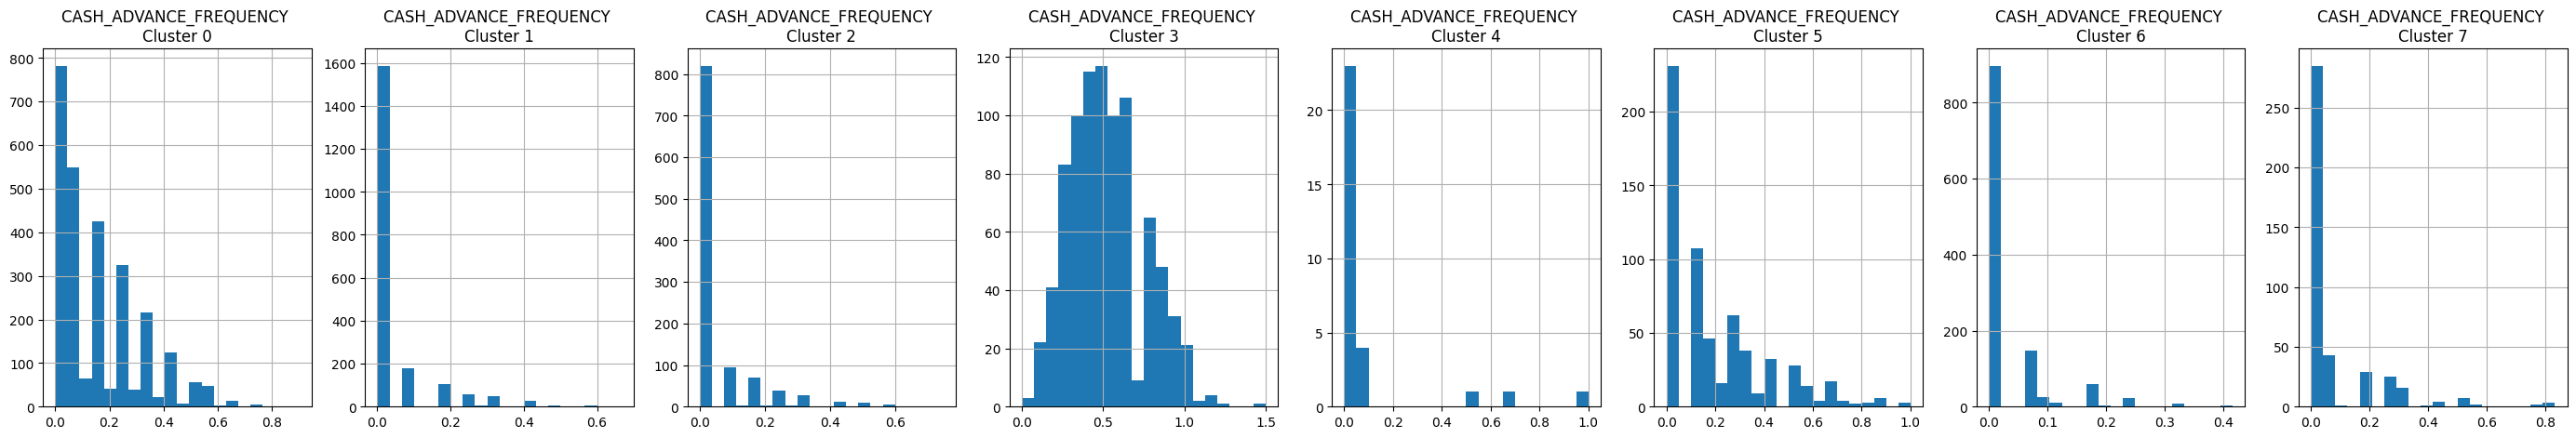

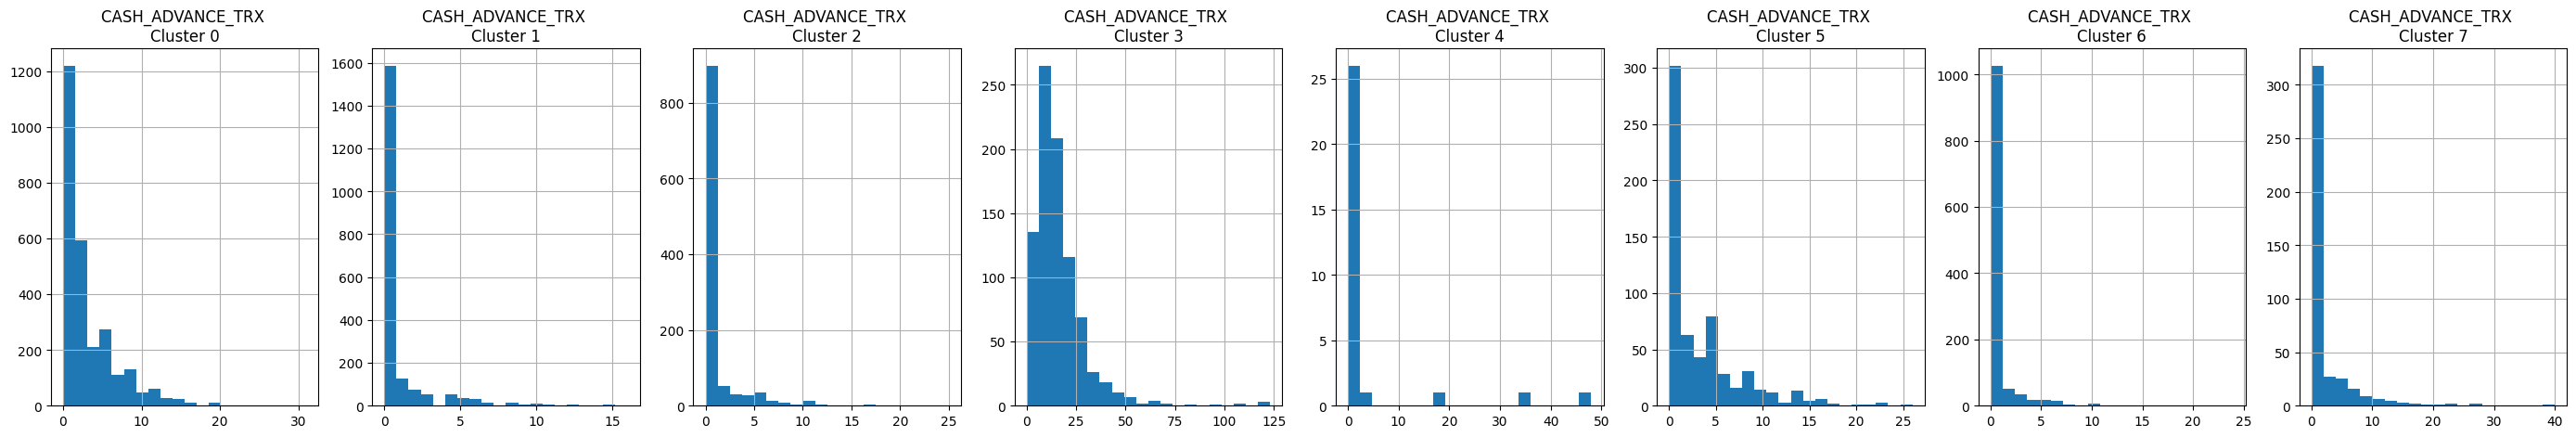

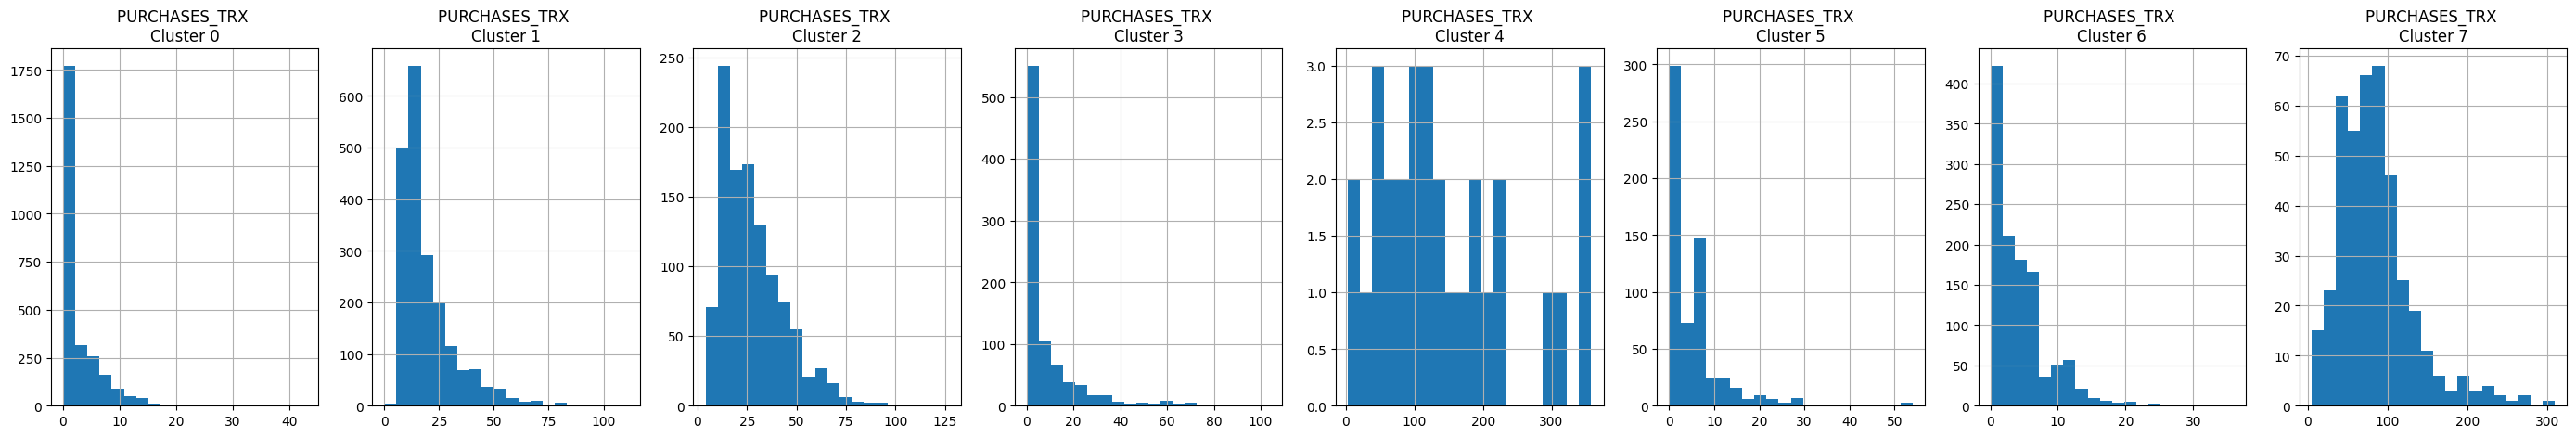

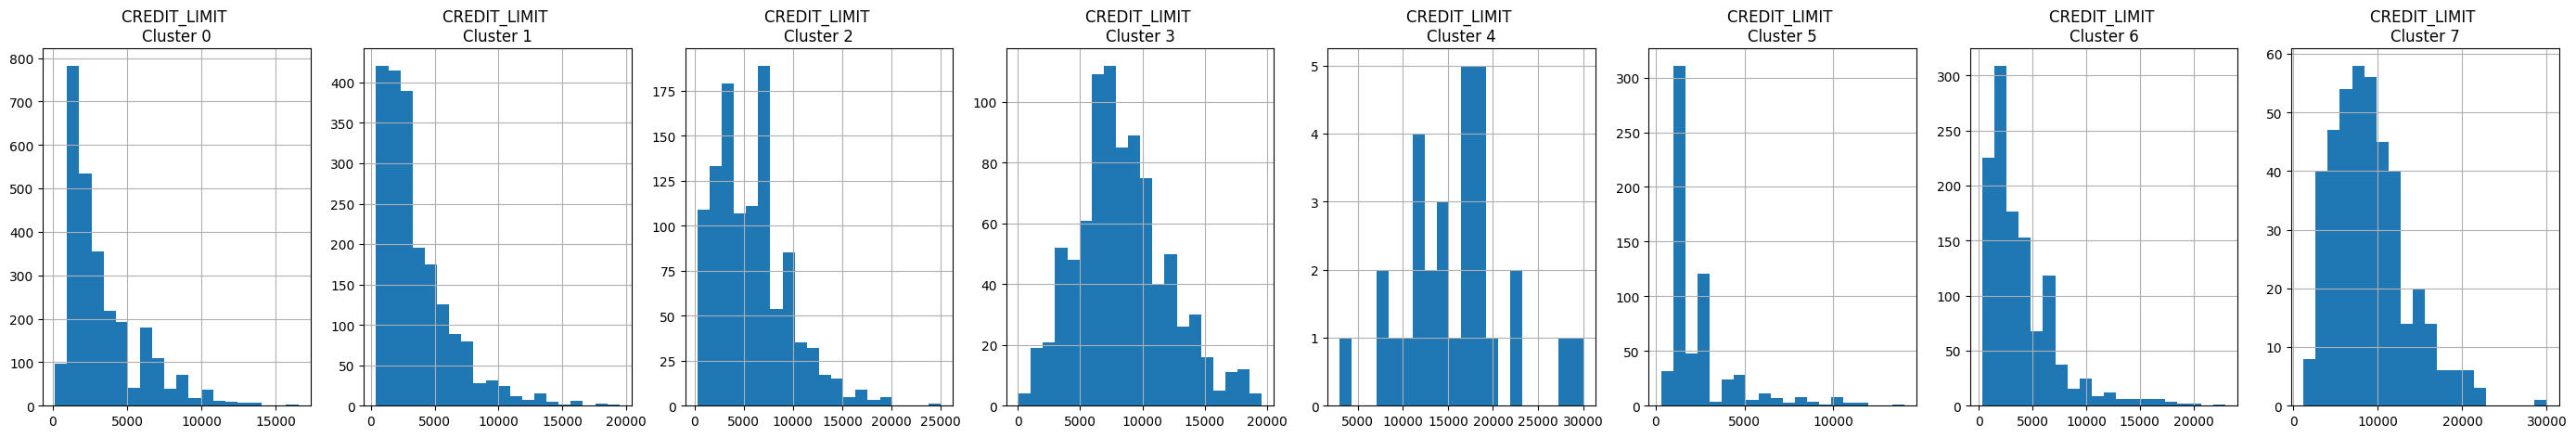

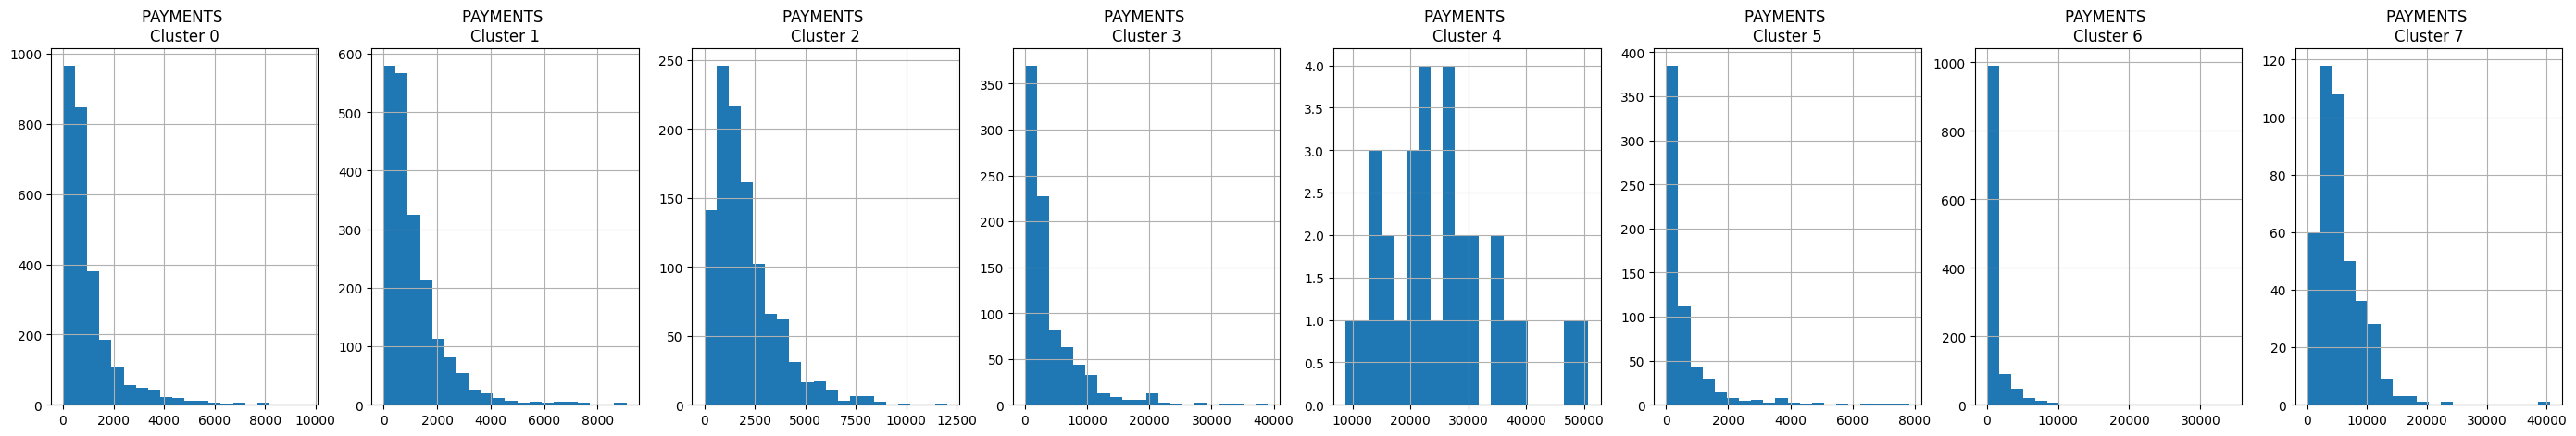

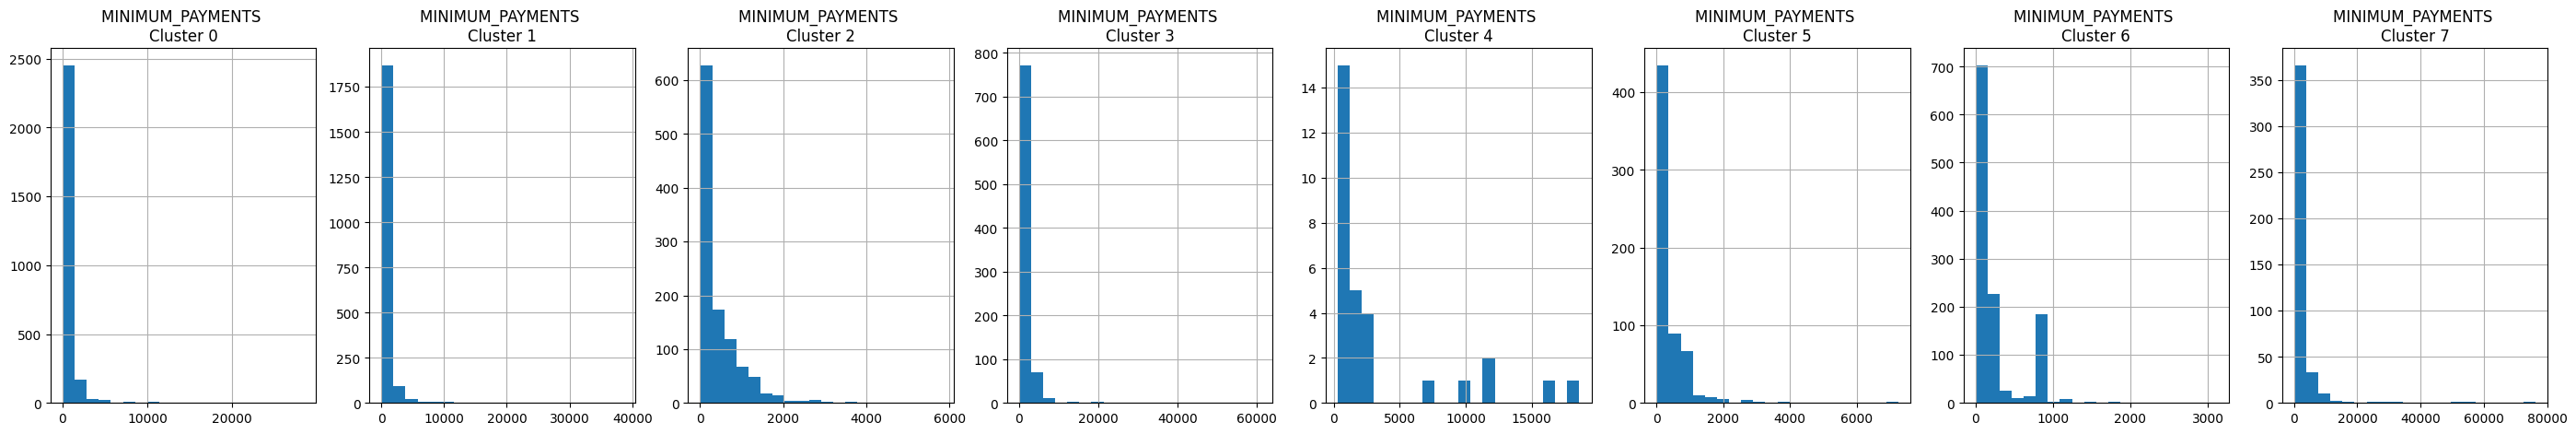

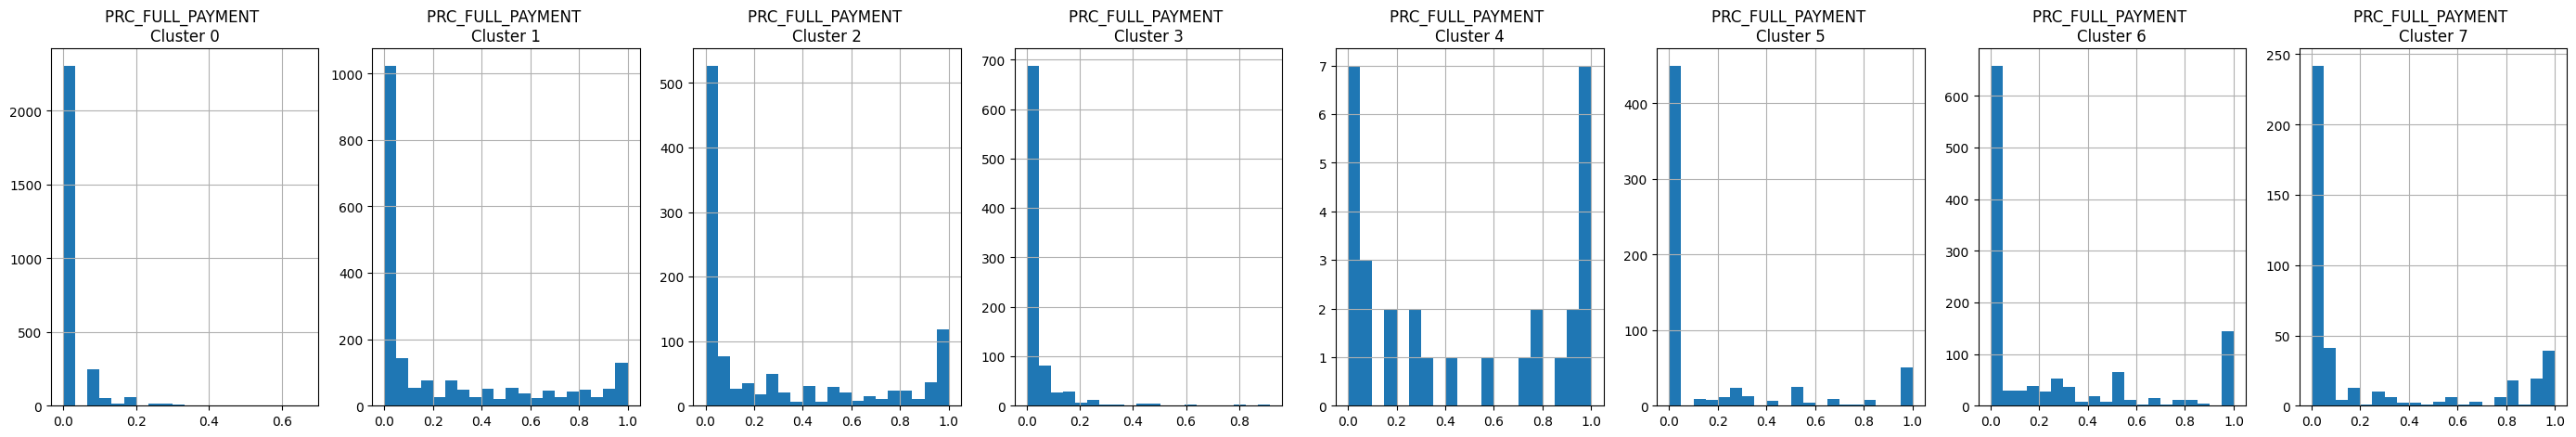

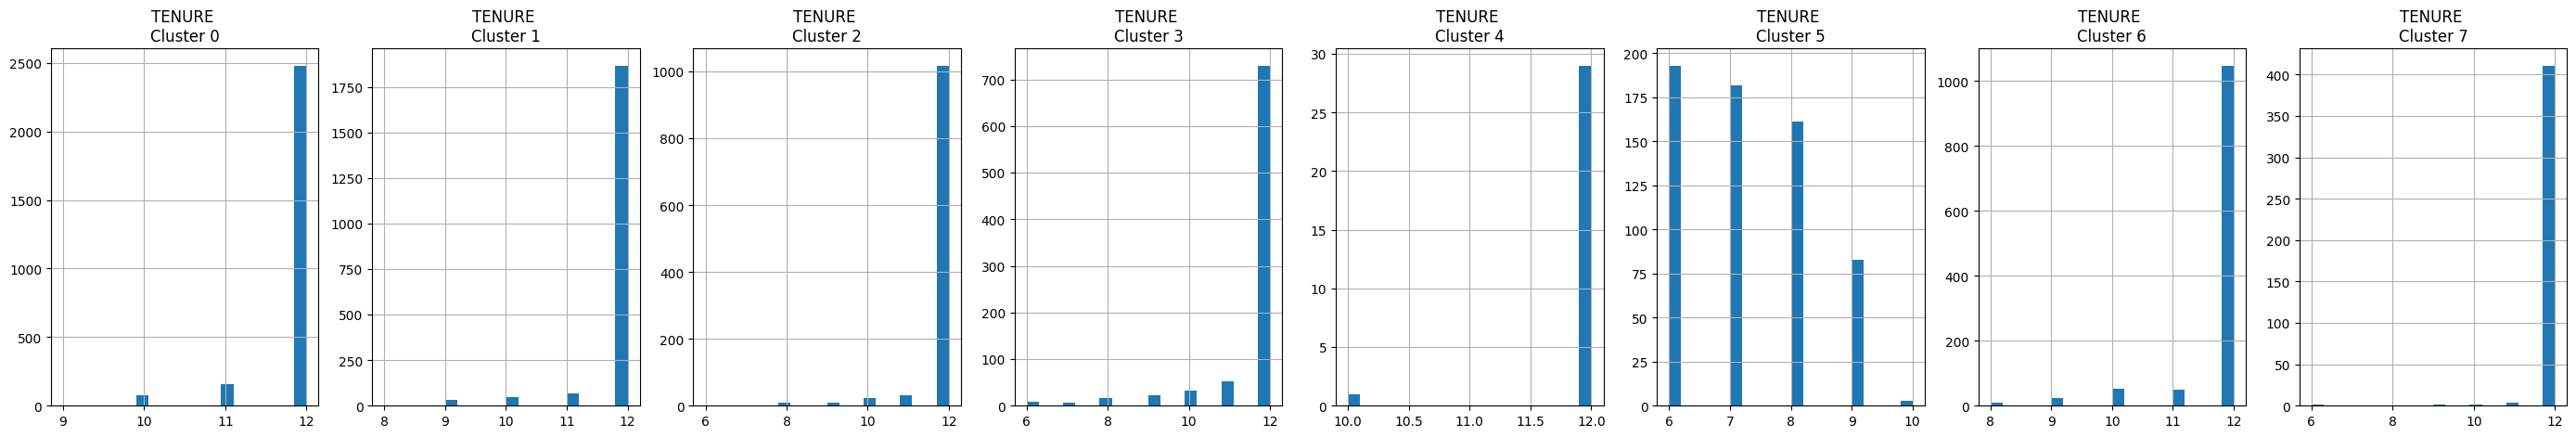

In [166]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster["CLUSTER"] == j]
        cluster[i].hist(bins= 20)
        plt.title('{} \nCluster {}'.format(i, j))
    plt.show()

In [167]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'CLUSTER')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
4218,1089.219786,1.000000,639.15,639.15,0.0,443.668004,0.416667,0.416667,0.000000,0.333333,5,11,3000.0,1095.752072,270.736901,0.000000,12,0
4223,5543.972323,1.000000,0.00,0.00,0.0,2231.203315,0.000000,0.000000,0.000000,0.333333,9,0,6000.0,1265.310930,1978.268240,0.000000,12,0
4225,226.785380,1.000000,210.64,210.64,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3500.0,295.155445,176.886468,0.000000,12,0
4226,41.643083,1.000000,212.00,212.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,596.834019,47.139699,0.083333,12,0


In [168]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
5240,566.477136,1.0,5370.39,1129.30,4241.09,0.000000,1.000000,0.500000,1.000000,0.000000,0,60,5700.0,4124.004704,224.493971,0.500000,12,7
269,2554.525229,1.0,6186.77,6099.08,87.69,1898.690655,0.916667,0.750000,0.250000,0.083333,1,38,10950.0,11198.926130,608.368860,0.083333,12,7
6216,683.357929,1.0,5105.17,2265.11,2840.06,0.000000,1.000000,0.750000,0.916667,0.000000,0,90,3500.0,4650.299879,177.946334,0.750000,12,7
1373,2792.534256,1.0,9661.37,9661.37,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,12,8500.0,6000.763458,682.274622,0.000000,12,7
3669,5970.705432,1.0,6091.51,2071.52,4019.99,0.000000,1.000000,0.666667,1.000000,0.000000,0,111,8500.0,2516.606708,1333.818771,0.000000,12,7


In [169]:
credit_ordered.to_csv('CLUSTER.csv')

APLICAÇÃO DO PCA (PRINCIPAL COMPONENT ANALYSIS) E VISUALIZAÇÃO DOS RESULTADOS

In [170]:
pca= PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222048, -1.07644774],
       [-1.13830166,  2.50650851],
       [ 0.96968961, -0.38354273],
       ...,
       [-0.92620204, -1.81079227],
       [-2.33655117, -0.65797002],
       [-0.55642064, -0.40047774]])

In [171]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076448
1,-1.138302,2.506509
2,0.969690,-0.383543
3,-0.873628,0.043171
4,-1.599434,-0.688580


In [172]:
pca_df = pd.concat([pca_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
pca_df.head()

,pca1,pca2,CLUSTER
0,-1.682220,-1.076448,0
1,-1.138302,2.506509,3
2,0.969690,-0.383543,2
3,-0.873628,0.043171,0
4,-1.599434,-0.688580,0


<Axes: xlabel='pca1', ylabel='pca2'>

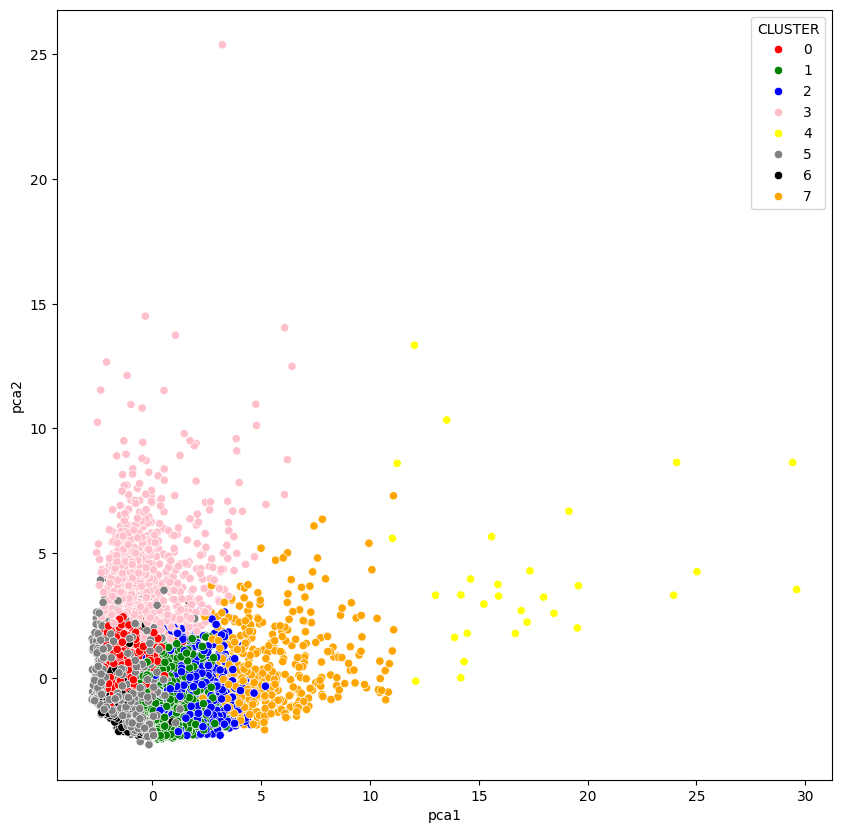

In [173]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y= 'pca2', hue='CLUSTER', data = pca_df, palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'black', 'orange'])

APLICAÇÃO DE AUTOENCODERS

In [174]:
creditcard_df_scaled.shape

(8950, 17)

In [175]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17 

In [176]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)
decoded = Dense(17)(x)

In [177]:
# AUTOENCODER
autoencoder = Model(input_df, decoded)

In [178]:
encoder = Model(input_df, encoded)

In [179]:
autoencoder.compile(optimizer= 'Adam', loss= 'mean_squared_error')

In [180]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs=50)

Epoch 1/50


280/280 [==============================] - 11s 32ms/step - loss: 0.1863
Epoch 2/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0817
Epoch 3/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0542
Epoch 4/50
280/280 [==============================] - 11s 40ms/step - loss: 0.0438
Epoch 5/50
280/280 [==============================] - 10s 34ms/step - loss: 0.0662
Epoch 6/50
280/280 [==============================] - 10s 36ms/step - loss: 0.0741
Epoch 7/50
280/280 [==============================] - 9s 34ms/step - loss: 0.0358
Epoch 8/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0446
Epoch 9/50
280/280 [==============================] - 10s 37ms/step - loss: 0.0340
Epoch 10/50
280/280 [==============================] - 9s 30ms/step - loss: 0.0309
Epoch 11/50
280/280 [==============================] - 9s 30ms/step - loss: 0.0400
Epoch 12/50
280/280 [==============================] - 10s 37ms/step - loss: 0.0265
Epoch 13/50
280/28

In [181]:
creditcard_df_scaled.shape

(8950, 17)

In [182]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 5ms/step


In [183]:
compact.shape

(8950, 10)

In [184]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [185]:
compact[0]

array([0.20619772, 1.1053296 , 0.42788872, 0.21592662, 0.13702062,
       0.09073239, 0.        , 1.127248  , 0.48486722, 0.        ],
      dtype=float32)

In [186]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

Text(0, 0.5, 'WCSS')

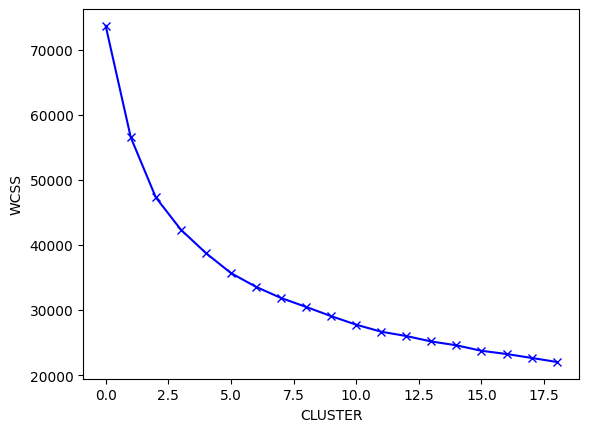

In [187]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('CLUSTER')
plt.ylabel('WCSS')

C:\Users\User\AppData\Local\Temp\ipykernel_10072\776470170.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, "bx-", color = 'r')
C:\Users\User\AppData\Local\Temp\ipykernel_10072\776470170.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color= 'g')


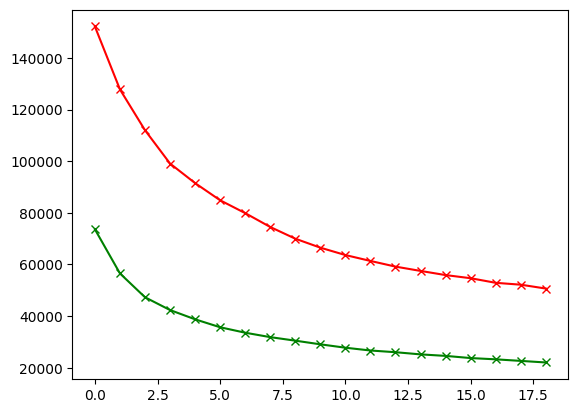

In [188]:
plt.plot(wcss_1, "bx-", color = 'r')
plt.plot(wcss_2, 'bx-', color= 'g')

In [189]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [190]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 0, 1, ..., 0, 0, 0]), (8950,))

In [191]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [194]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(compact)
prin_comp.shape

(8950, 2)

In [200]:
pca_df = pd.DataFrame(data=prin_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.293514,0.036824
1,1.225222,-1.558972
2,-0.795595,0.345875
3,0.044389,-0.024081
4,-1.497940,0.008543


In [201]:
pca_df = pd.concat([pca_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
pca_df.head()

,pca1,pca2,CLUSTER
0,-1.293514,0.036824,1
1,1.225222,-1.558972,0
2,-0.795595,0.345875,1
3,0.044389,-0.024081,0
4,-1.497940,0.008543,1


<Axes: xlabel='pca1', ylabel='pca2'>

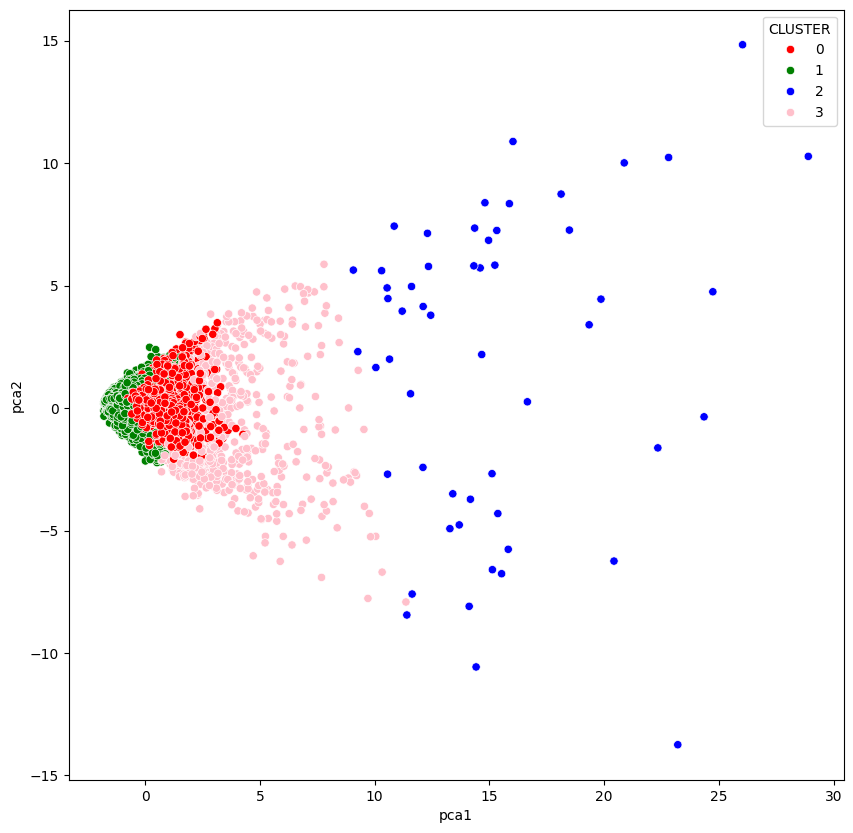

In [202]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y= 'pca2', hue='CLUSTER', data = pca_df, palette=['red', 'green', 'blue', 'pink'])

In [203]:
df_cluster_ordered = df_cluster_at.sort_values(by='CLUSTER')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.00,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,0
2535,9.526312,0.545455,92.02,0.00,92.02,0.000000,0.500000,0.000000,0.50,0.000000,0,6,1600.0,100.915736,82.436727,0.500000,12,0
2536,95.853493,0.545455,796.90,0.00,796.90,0.000000,0.750000,0.000000,0.75,0.000000,0,9,1950.0,1475.770687,160.568063,0.222222,12,0
2540,918.401897,0.454545,0.00,0.00,0.00,3176.804663,0.000000,0.000000,0.00,0.166667,2,0,3500.0,4404.853578,254.748687,0.000000,12,0
6911,311.987575,0.363636,684.24,0.00,684.24,0.000000,1.000000,0.000000,1.00,0.000000,0,37,1000.0,2154.534733,508.095621,0.000000,12,0


In [204]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
4426,9699.252383,1.0,0.00,0.00,0.00,10630.321020,0.000000,0.000000,0.0,0.833333,27,0,10000.0,13001.037150,3897.073997,0.000000,12,3
5287,7268.706380,1.0,306.91,306.91,0.00,12702.427700,0.272727,0.272727,0.0,1.000000,93,4,12000.0,3512.633784,2096.962594,0.000000,11,3
2404,1553.505165,1.0,522.00,0.00,522.00,0.000000,1.000000,0.000000,1.0,0.000000,0,14,1000.0,472.580919,15584.097420,0.000000,12,3
2391,2416.771489,1.0,4201.13,3802.21,398.92,3306.574157,1.000000,0.750000,1.0,0.166667,11,82,5500.0,6091.906636,830.395060,0.200000,12,3
1490,1177.125233,1.0,8190.90,6949.66,1241.24,0.000000,1.000000,0.916667,0.5,0.000000,0,56,5000.0,7007.797351,354.703333,0.416667,12,3


In [209]:
df_cluster_ordered.to_excel('CLUSTER_ordered.xlsx')